In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense, Dropout
from sklearn.ensemble import RandomForestClassifier

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
x_sub = pd.read_csv('/content/drive/MyDrive/x_test.csv')
data =  pd.read_csv('/content/drive/MyDrive/aug_train.csv')

In [ ]:
x = pd.read_csv('/content/drive/MyDrive/x_train.csv')
y = pd.read_csv('/content/drive/MyDrive/y_train.csv')

In [ ]:
x.head()

,index,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,17007,city_61,0.913,Male,Has relevent experience,no_enrollment,Masters,STEM,4,100-500,NGO,1,22
1,631,city_94,0.698,Male,Has relevent experience,NaN,High School,NaN,3,NaN,NaN,1,22
2,669,city_114,0.926,NaN,Has relevent experience,Full time course,Masters,STEM,9,50-99,Pvt Ltd,1,88
3,8949,city_114,0.926,Male,No relevent experience,Full time course,Graduate,STEM,14,NaN,NaN,4,91
4,2341,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,1,5000-9999,Pvt Ltd,1,92


In [ ]:
x.gender.fillna('Unknown',inplace=True)
#x.gender.fillna(x.gender.mode()[0],inplace=True)

In [ ]:
## Experience column
x.experience.fillna(x.experience.mode()[0],inplace=True)
x.experience.replace('>20',25,inplace=True)
x.experience.replace('<1',0,inplace=True)
x.experience.fillna(0,inplace=True)
#x.experience.dropna(inplace=True)

x.experience = x.experience.astype('int')


In [ ]:
## Last New Job Column
#x.last_new_job.fillna(x.last_new_job.mode()[0],inplace=True)
x.last_new_job.replace('>4',5,inplace=True)
x.last_new_job.replace('never',0,inplace=True)
x.last_new_job.fillna(0,inplace=True)
#x.last_new_job.dropna(inplace=True)

x.last_new_job = x.last_new_job.astype('int')

In [ ]:
## company_size
x.company_size.replace('10/49',30,inplace=True)

x.company_size.replace('10-49',30,inplace=True)
x.company_size.replace('<10',30,inplace=True)
x.company_size.replace('50-99',100,inplace=True)
x.company_size.replace('100-500',100,inplace=True)
x.company_size.replace('500-999',1000,inplace=True)
x.company_size.replace('1000-4999',1000,inplace=True)
x.company_size.replace('5000-9999',10000,inplace=True)
x.company_size.replace('10000+',10000,inplace=True)

x.company_size.fillna(0,inplace=True)
#x.company_size.fillna(x.company_size.mode()[0],inplace=True)
x.company_size = x.company_size.astype('int')

In [ ]:
x.isna().sum()

index                        0
city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university        292
education_level            338
major_discipline          2089
experience                   0
company_size                 0
company_type              4598
last_new_job                 0
training_hours               0
dtype: int64

In [ ]:
x.fillna('Unknown',inplace=True)
#col = ['enrolled_university','education_level','major_discipline']
#for i in col:
#  x[i].fillna(x[i].mode()[0],inplace=True)


In [ ]:
cat = {"Phd":5, "Masters":4,"Graduate":3,"High School":2,"Primary School":1,"Unknown":0}
#cat = {"Phd":4, "Masters":3,"Graduate":2,"High School":1,"Primary School":0}
x.education_level.replace(cat,inplace=True)
x.education_level = x.education_level.astype('int')

re = {"Has relevent experience":1,"No relevent experience":0}
x.relevent_experience.replace(re,inplace=True)
x.relevent_experience = x.relevent_experience.astype("int")

gen = {"Male":3,"Female":2,"Other":1,"Unknown":0}
x.gender.replace(gen,inplace=True)
x.gender = x.gender.astype("int")

en = {"Full time course":3,"Part time course":2,"no_enrollment":1,"Unknown":0}
x.enrolled_university.replace(en,inplace=True)
x.enrolled_university = x.enrolled_university.astype("int")

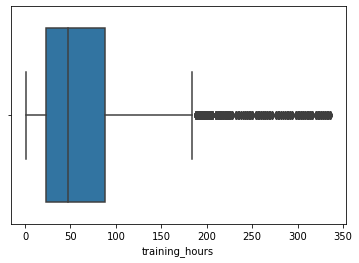

In [ ]:
sns.boxplot(x=x['training_hours'])

In [ ]:
x.loc[x['training_hours'] > 180,'training_hours'] = x.training_hours.median()

In [ ]:
x.drop(['index','city'],axis=1,inplace=True)

In [ ]:
converted_list_1 = []
for i in range(len(x["city"])):
  j = x["city"][i].replace("city_","")
  converted_list_1.append(j)
  
x['city'] = converted_list_1

x.city = x.city.astype('int')

In [ ]:
x = pd.get_dummies(x)

In [ ]:
x.shape

(14368, 23)

In [ ]:
df = pd.merge(x,y,how='inner',on='index')

KeyError: ignored

In [ ]:
majority_samples = df[df.target == 0].index

minority_samples = df[df.target == 1].index

random = np.random.choice(majority_samples,len(df[df.target==1]),replace=False)
print(len(random))

undersample = np.concatenate([minority_samples,random])

x = df.loc[undersample]

x.drop('index',inplace=True,axis=1)
X1= x.drop('target',axis=1)
Y1 = x['target']

3563


In [ ]:
### deal with inbalance data

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss
smt = SMOTE(random_state=47)
oversample = RandomOverSampler()
undersample = RandomUnderSampler()
nmiss = NearMiss(version=2, n_neighbors=5)
X1 = x
Y1 = y['target']
print(X1.shape,Y1.shape)
X1,Y1=undersample.fit_resample(X1,Y1)
print(X1.shape,Y1.shape)

(14368, 23) (14368,)
(7126, 23) (7126,)


In [ ]:
Y1.value_counts()

0.0    3563
1.0    3563
Name: target, dtype: int64

## Linear Regression

In [ ]:
## Regularization
from sklearn.linear_model import Lasso, Ridge


x_train,x_test,y_train,y_test = train_test_split(X1,Y1,test_size=0.2)

y_test = y_test.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)


Parameters = [{"alpha":[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}]

ls = Lasso()
fold = KFold(n_splits = 5,random_state=42,shuffle=True)
model_cv = GridSearchCV(estimator=ls,param_grid=Parameters,scoring="neg_mean_squared_error",cv=fold,verbose=1,return_train_score=True)

model_cv.fit(x_train,y_train)
print(model_cv.best_params_)

rd = Ridge()
fold = KFold(n_splits = 5,random_state=42,shuffle=True)
model_cv1 = GridSearchCV(estimator=ls,param_grid=Parameters,scoring="neg_mean_squared_error",cv=fold,verbose=1,return_train_score=True)

model_cv1.fit(x_train,y_train)
print(model_cv1.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'alpha': 1e-08}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'alpha': 1e-08}


In [ ]:
## Lasso 

ls = Lasso(alpha = 1e-08)
ls.fit(x_train,y_train)
y_pred_train = ls.predict(x_train)


def sig(y_t):
  y =[]
  for i in y_t:
    if i > 0.5:
      y.append(1)
    else:
      y.append(0)
  return y

y_t = sig(y_pred_train)
print(f1_score(y_t,y_train))
print(classification_report(y_t,y_train))

y_pred_test = ls.predict(x_test)
y_t = sig(y_pred_test)
print(f1_score(y_t,y_test))
print(classification_report(y_t,y_test))

rd = Ridge(alpha = 1e-08)
rd.fit(x_train,y_train)

y_pred_train1 = rd.predict(x_train)
y_t = sig(y_pred_train1)
print(f1_score(y_t,y_train))
print(classification_report(y_t,y_train))

y_pred_test1 = rd.predict(x_test)
y_t = sig(y_pred_test1)
print(f1_score(y_t,y_test))
print(classification_report(y_t,y_test))



0.7860168152222011
              precision    recall  f1-score   support

           0       0.89      0.76      0.82     10104
           1       0.72      0.87      0.79      7184

    accuracy                           0.80     17288
   macro avg       0.80      0.81      0.80     17288
weighted avg       0.82      0.80      0.81     17288

0.7914278594567655
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      2479
           1       0.73      0.86      0.79      1843

    accuracy                           0.81      4322
   macro avg       0.81      0.81      0.81      4322
weighted avg       0.82      0.81      0.81      4322

0.7860168152222011
              precision    recall  f1-score   support

           0       0.89      0.76      0.82     10104
           1       0.72      0.87      0.79      7184

    accuracy                           0.80     17288
   macro avg       0.80      0.81      0.80     17288
weighted avg     

## Random Forest 

In [ ]:
## Tuning
x_train,x_test,y_train,y_test = train_test_split(X1,Y1,test_size=0.2)

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)

params = { 'max_depth': [60,75,80,90,100],
          'n_estimators':[50,100,150,200],'bootstrap':[True,False],'criterion':['entropy','gini']}

dtc = RandomForestClassifier()

grid_search = GridSearchCV(estimator=dtc, 
                           param_grid=params, 
                           cv=5, n_jobs=-1, verbose=1, scoring = "accuracy")

grid_search.fit(x_train,y_train)

print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best: 0.627544 using {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 80, 'n_estimators': 200}


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X1,Y1,test_size=0.2)

scaler = MinMaxScaler()
#x_train = scaler.fit_transform(x_train)
#x_test = scaler.fit_transform(x_test)

rf = RandomForestClassifier(max_depth=100,criterion='entropy')
rf.fit(x_train,y_train)

y_pred_train = rf.predict(x_train)
print(classification_report(y_pred_train,y_train))
print(f1_score(y_pred_train,y_train),'\n\n')


y_pred_test = rf.predict(x_test)
print(classification_report(y_pred_test,y_test))
print(f1_score(y_pred_test,y_test),'\n\n')

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2830
         1.0       1.00      1.00      1.00      2870

    accuracy                           1.00      5700
   macro avg       1.00      1.00      1.00      5700
weighted avg       1.00      1.00      1.00      5700

0.9989547038327526 


              precision    recall  f1-score   support

         0.0       0.78      0.77      0.77       746
         1.0       0.75      0.76      0.75       680

    accuracy                           0.76      1426
   macro avg       0.76      0.76      0.76      1426
weighted avg       0.76      0.76      0.76      1426

0.7545520757465405 




## Decision Tree

In [ ]:
## Tuning
from sklearn.tree import DecisionTreeClassifier
x_train,x_test,y_train,y_test = train_test_split(X1,Y1,test_size=0.2)

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)

params = {
    'max_depth': [50,60,70,80,90,100],
   
}

dtc = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=dtc, 
                           param_grid=params, 
                           cv=5, n_jobs=-1, verbose=1, scoring = "accuracy")

grid_search.fit(x_train,y_train)

print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best: 0.847467 using {'max_depth': 50}


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

x_train,x_test,y_train,y_test = train_test_split(X1,Y1,test_size=0.2)

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

dtc = DecisionTreeClassifier(max_depth=100)


dtc.fit(x_train,y_train)

y_pred_train = dtc.predict(x_train)
print(classification_report(y_pred_train,y_train))
print(f1_score(y_pred_train,y_train),'\n\n')


y_pred_test = dtc.predict(x_test)
print(classification_report(y_pred_test,y_test))
print(f1_score(y_pred_test,y_test),'\n\n')

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2846
         1.0       1.00      1.00      1.00      2854

    accuracy                           1.00      5700
   macro avg       1.00      1.00      1.00      5700
weighted avg       1.00      1.00      1.00      5700

0.9992997198879552 


              precision    recall  f1-score   support

         0.0       0.69      0.67      0.68       742
         1.0       0.65      0.67      0.66       684

    accuracy                           0.67      1426
   macro avg       0.67      0.67      0.67      1426
weighted avg       0.67      0.67      0.67      1426

0.6580273578113751 




## Neural Networks

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X1,Y1,test_size=0.2)

In [ ]:
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
model = Sequential(Dense(64,activation='relu',input_dim=29))
model.add(Dropout(0.125))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=500)

179/179 [==============================] - 0s 2ms/step - loss: 0.3826 - accuracy: 0.8198
Epoch 484/500
179/179 [==============================] - 0s 2ms/step - loss: 0.3922 - accuracy: 0.8172
Epoch 485/500
179/179 [==============================] - 0s 2ms/step - loss: 0.3885 - accuracy: 0.8196
Epoch 486/500
179/179 [==============================] - 0s 2ms/step - loss: 0.3847 - accuracy: 0.8228
Epoch 487/500
179/179 [==============================] - 0s 2ms/step - loss: 0.3833 - accuracy: 0.8254
Epoch 488/500
179/179 [==============================] - 0s 2ms/step - loss: 0.3789 - accuracy: 0.8274
Epoch 489/500
179/179 [==============================] - 0s 2ms/step - loss: 0.3787 - accuracy: 0.8272
Epoch 490/500
179/179 [==============================] - 0s 2ms/step - loss: 0.3864 - accuracy: 0.8225
Epoch 491/500
179/179 [==============================] - 0s 2ms/step - loss: 0.3850 - accuracy: 0.8272
Epoch 492/500
179/179 [==============================] - 0s 2ms/step - loss: 0.3787 - a

In [ ]:

y_train_pred = model.predict(x_train)
#y_train_pred = np.argmax(y_train_pred, axis = 1)
y_train_pred1 = []
for i in y_train_pred:
  if i > 0.5:
    y_train_pred1.append(1)a
  else:
    y_train_pred1.append(0)

print(classification_report(y_train_pred1,y_train))
f1_score(y_train_pred1,y_train)

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      2866
           1       0.85      0.86      0.86      2834

    accuracy                           0.86      5700
   macro avg       0.86      0.86      0.86      5700
weighted avg       0.86      0.86      0.86      5700



0.8558875219683656

In [ ]:
y_test_pred = model.predict(x_test)
y_test_pred1 = []
for i in y_test_pred:
  if i > 0.5:
    y_test_pred1.append(1)
  else:
    y_test_pred1.append(0)

#print(len(y_test),len(y_test_pred1))
print(classification_report(y_test_pred1,y_test))
f1_score(y_test_pred1,y_test)

              precision    recall  f1-score   support

           0       0.71      0.70      0.71       733
           1       0.69      0.70      0.70       693

    accuracy                           0.70      1426
   macro avg       0.70      0.70      0.70      1426
weighted avg       0.70      0.70      0.70      1426



0.6971428571428571

## Logistic Regression

In [ ]:
##Tuning the Hyperparameters in LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(X1,Y1,test_size=0.2)

y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

lr = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear','sag','saga']
penalty = ['l1','l2','none','elasticnet']
c_values = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20,30,40,50,100]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
folds = KFold(n_splits=5,shuffle=True,random_state=100)

grid_sea = GridSearchCV(estimator=lr,param_grid=grid,cv=folds,scoring="accuracy",n_jobs=-1,error_score=0)
grid_sea.fit(x_train,y_train)
# summarize results
print("Best: %f using %s" % (grid_sea.best_score_, grid_sea.best_params_))
means = grid_sea.cv_results_['mean_test_score']
stds = grid_sea.cv_results_['std_test_score']
params = grid_sea.cv_results_['params']
#for mean, stdev, param in zip(means, stds, params):
#    print("%f (%f) with: %r" % (mean, stdev, param))



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
630 fits failed out of a total of 1400.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

Best: 0.838674 using {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
0.000000 (0.000000) with: {'C': 1e-15, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 1e-15, 'penalty': 'l1', 'solver': 'lbfgs'}
0.502083 (0.012181) with: {'C': 1e-15, 'penalty': 'l1', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 1e-15, 'penalty': 'l1', 'solver': 'sag'}
0.496994 (0.011986) with: {'C': 1e-15, 'penalty': 'l1', 'solver': 'saga'}
0.491266 (0.008742) with: {'C': 1e-15, 'penalty': 'l2', 'solver': 'newton-cg'}
0.502083 (0.012181) with: {'C': 1e-15, 'penalty': 'l2', 'solver': 'lbfgs'}
0.502083 (0.012181) with: {'C': 1e-15, 'penalty': 'l2', 'solver': 'liblinear'}
0.491266 (0.008742) with: {'C': 1e-15, 'penalty': 'l2', 'solver': 'sag'}
0.491266 (0.008742) with: {'C': 1e-15, 'penalty': 'l2', 'solver': 'saga'}
0.838617 (0.002442) with: {'C': 1e-15, 'penalty': 'none', 'solver': 'newton-cg'}
0.838501 (0.002329) with: {'C': 1e-15, 'penalty': 'none', 'solver': 'lbfgs'}
0.000000 (0.0000

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [ ]:
## With Logistic Regression

x_train,x_test,y_train,y_test = train_test_split(X1,Y1,test_size=0.2)

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

lr = LogisticRegression(C=10,penalty= 'l1',solver='saga')

lr.fit(x_train,y_train)

##predicting with train values
y_pred_train = lr.predict(x_train)

print('classification_report:\n',classification_report(y_pred_train,y_train))
print('confusion_matrix:\n',confusion_matrix(y_pred_train,y_train))
print('f1_score: ',f1_score(y_pred_train,y_train))


##predicting with test values
y_pred_test = lr.predict(x_test)

print('classification_report:\n',classification_report(y_pred_test,y_test))
print('confusion_matrix:\n',confusion_matrix(y_pred_test,y_test))
print('f1_score: ',f1_score(y_pred_test,y_test))

classification_report:
               precision    recall  f1-score   support

         0.0       0.92      0.79      0.85      9961
         1.0       0.76      0.90      0.83      7327

    accuracy                           0.84     17288
   macro avg       0.84      0.85      0.84     17288
weighted avg       0.85      0.84      0.84     17288

confusion_matrix:
 [[7908 2053]
 [ 724 6603]]
f1_score:  0.8262528936995558
classification_report:
               precision    recall  f1-score   support

         0.0       0.91      0.80      0.85      2469
         1.0       0.77      0.89      0.83      1853

    accuracy                           0.84      4322
   macro avg       0.84      0.85      0.84      4322
weighted avg       0.85      0.84      0.84      4322

confusion_matrix:
 [[1973  496]
 [ 200 1653]]
f1_score:  0.826086956521739


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


## Orginial Data

In [ ]:
data.gender.fillna('Unknown',inplace=True)

In [ ]:
converted_list_1 = []
for i in range(len(data["city"])):
  j = data["city"][i].replace("city_","")
  converted_list_1.append(j)
  
data['city'] = converted_list_1

data.city = data.city.astype('int')

In [ ]:
## Experience column
data.experience.replace('>20',25,inplace=True)
data.experience.replace('<1',0,inplace=True)
data.experience.fillna(0,inplace=True)
data.experience = data.experience.astype('int')



## Last New Job Column
data.last_new_job.replace('>4',5,inplace=True)
data.last_new_job.replace('never',0,inplace=True)
data.last_new_job.fillna(0,inplace=True)
data.last_new_job = data.last_new_job.astype('int')


## company_size
data.company_size.replace('10/49',30,inplace=True)

data.company_size.replace('10-49',30,inplace=True)
data.company_size.replace('<10',30,inplace=True)
data.company_size.replace('50-99',100,inplace=True)
data.company_size.replace('100-500',100,inplace=True)
data.company_size.replace('500-999',1000,inplace=True)
data.company_size.replace('1000-4999',1000,inplace=True)
data.company_size.replace('5000-9999',10000,inplace=True)
data.company_size.replace('10000+',10000,inplace=True)
data.company_size.fillna(0,inplace=True)

#col = ['enrolled_university','education_level','major_discipline','company_size']
#for i in col:
#  data[i].fillna(data[i].mode()[0],inplace=True)

data.fillna('Unknown',inplace=True)

#data.drop(['enrollee_id'],axis=1,inplace=True)


data.education_level.value_counts()
cat = {"Phd":5, "Masters":4,"Graduate":3,"High School":2,"Primary School":1,"Unknown":0}
data.education_level.replace(cat,inplace=True)
data.education_level = data.education_level.astype('int')

re = {"Has relevent experience":1,"No relevent experience":0}
data.relevent_experience.replace(re,inplace=True)
data.relevent_experience = data.relevent_experience.astype("int")

gen = {"Male":3,"Female":2,"Other":1,"Unknown":0}
data.gender.replace(gen,inplace=True)
data.gender = data.gender.astype("int")

en = {"Full time course":3,"Part time course":2,"no_enrollment":1,"Unknown":0}
data.enrolled_university.replace(en,inplace=True)
data.enrolled_university = data.enrolled_university.astype("int")

data.drop(['enrollee_id','city'],axis=1,inplace=True)

In [ ]:
data = pd.get_dummies(data)

In [ ]:
x_data = data.drop('target',axis=1)
y_data = data['target']

In [ ]:
x_data.columns

Index(['city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'experience', 'company_size',
       'last_new_job', 'training_hours', 'major_discipline_Arts',
       'major_discipline_Business Degree', 'major_discipline_Humanities',
       'major_discipline_No Major', 'major_discipline_Other',
       'major_discipline_STEM', 'major_discipline_Unknown',
       'company_type_Early Stage Startup', 'company_type_Funded Startup',
       'company_type_NGO', 'company_type_Other', 'company_type_Public Sector',
       'company_type_Pvt Ltd', 'company_type_Unknown'],
      dtype='object')

## Original Data submission 

In [ ]:
y_test_pred = rf.predict(x_data)
#y_t = sig(y_test_pred)
print(classification_report(y_test_pred,y_data))
f1_score(y_test_pred,y_data)

              precision    recall  f1-score   support

         0.0       0.81      0.96      0.88     12185
         1.0       0.89      0.61      0.73      6973

    accuracy                           0.83     19158
   macro avg       0.85      0.79      0.80     19158
weighted avg       0.84      0.83      0.82     19158



0.7266382978723404

## Submission Data

In [ ]:
## Cleaning real_test1
index = x_sub['index']

In [ ]:
x_sub.gender.fillna('Unknown',inplace=True)
#x_sub.gender.fillna(x_sub.gender.mode()[0],inplace=True)

In [ ]:
converted_list_1 = []
for i in range(len(x_sub["city"])):
  j = x_sub["city"][i].replace("city_","")
  converted_list_1.append(j)
  
x_sub['city'] = converted_list_1

x_sub.city = x_sub.city.astype('int')

In [ ]:
## Experience column
x_sub.experience.replace('>20',25,inplace=True)
x_sub.experience.replace('<1',0,inplace=True)
x_sub.experience.fillna(0,inplace=True)
#x_sub.experience.fillna(x_sub.experience.mode()[0],inplace=True)
x_sub.experience = x_sub.experience.astype('int')



## Last New Job Column
x_sub.last_new_job.replace('>4',5,inplace=True)
x_sub.last_new_job.replace('never',0,inplace=True)
x_sub.last_new_job.fillna(0,inplace=True)
#x_sub.last_new_job.fillna(x_sub.last_new_job.mode()[0],inplace=True)
x_sub.last_new_job = x_sub.last_new_job.astype('int')


## company_size
x_sub.company_size.replace('10/49',30,inplace=True)

x_sub.company_size.replace('10-49',30,inplace=True)
x_sub.company_size.replace('<10',30,inplace=True)
x_sub.company_size.replace('50-99',100,inplace=True)
x_sub.company_size.replace('100-500',100,inplace=True)
x_sub.company_size.replace('500-999',1000,inplace=True)
x_sub.company_size.replace('1000-4999',1000,inplace=True)
x_sub.company_size.replace('5000-9999',10000,inplace=True)
x_sub.company_size.replace('10000+',10000,inplace=True)

x_sub.company_size.fillna(0,inplace=True)
#x_sub.company_size.fillna(x_sub.company_size.mode()[0],inplace=True)



#cols = ['enrolled_university','education_level','major_discipline','company_size']

#for i in cols:
#  x_sub[i].fillna(x_sub[i].mode()[0],inplace=True)
#x_sub.company_type.fillna(x_sub.company_type.mode()[0],inplace=True)
x_sub.fillna('Unknown',inplace=True)

x_sub.drop(['index','city'],axis=1,inplace=True)




In [ ]:
x_sub.education_level.value_counts()
cat = {"Phd":5, "Masters":4,"Graduate":3,"High School":2,"Primary School":1,"Unknown":0}
#cat = {"Phd":4, "Masters":3,"Graduate":2,"High School":1,"Primary School":0}
x_sub.education_level.replace(cat,inplace=True)
x_sub.education_level = x_sub.education_level.astype('int')

re = {"Has relevent experience":1,"No relevent experience":0}
x_sub.relevent_experience.replace(re,inplace=True)
x_sub.relevent_experience = x_sub.relevent_experience.astype("int")

In [ ]:
x_sub = pd.get_dummies(x_sub)

In [ ]:
x_sub.shape

(4790, 29)

In [ ]:
x_sub.columns

Index(['city_development_index', 'relevent_experience', 'education_level',
       'experience', 'company_size', 'last_new_job', 'training_hours',
       'gender_Female', 'gender_Male', 'gender_Other', 'gender_Unknown',
       'enrolled_university_Full time course',
       'enrolled_university_Part time course', 'enrolled_university_Unknown',
       'enrolled_university_no_enrollment', 'major_discipline_Arts',
       'major_discipline_Business Degree', 'major_discipline_Humanities',
       'major_discipline_No Major', 'major_discipline_Other',
       'major_discipline_STEM', 'major_discipline_Unknown',
       'company_type_Early Stage Startup', 'company_type_Funded Startup',
       'company_type_NGO', 'company_type_Other', 'company_type_Public Sector',
       'company_type_Pvt Ltd', 'company_type_Unknown'],
      dtype='object')

## Predicting

In [ ]:
y_sub_pred = rf.predict_proba(x_sub)

In [ ]:
submission = pd.DataFrame({'index':index,'target':y_sub_pred[:,1]})

In [ ]:
submission.target.value_counts()

0.180000    102
0.220000     96
0.250000     95
0.230000     89
0.170000     88
           ... 
0.512500      1
0.246667      1
0.232000      1
0.195000      1
0.345000      1
Name: target, Length: 176, dtype: int64

In [ ]:
submission.to_csv('/content/drive/MyDrive/Submission64.csv',index=None)

In [ ]:
df13 = pd.read_csv('/content/drive/MyDrive/Submission59.csv')

In [ ]:
df13.target.value_counts()

0.270000    100
0.230000     92
0.180000     91
0.160000     91
0.190000     90
           ... 
0.195000      1
0.109000      1
0.726667      1
0.174500      1
0.245000      1
Name: target, Length: 157, dtype: int64

In [ ]:
df13.target

0       0.040
1       0.150
2       0.610
3       0.080
4       0.110
        ...  
4785    0.690
4786    0.245
4787    0.600
4788    0.780
4789    0.200
Name: target, Length: 4790, dtype: float64